In [1]:
rev_m = 1000 #Expected Revenue in millions $
rev_stdev = 200 #Standard Deviation in millions $

cogs_m = 0.7  #70% of Revenue
cogs_stdev = 0.1 #10% range (using last 5-yr data)

op_expenses_m = 300 #Expected Operating expenses in millions $
op_expenses_stdev = 50 #Standard Deviation in millions $

iterations = 1000  #Numbers of Monte Carlo Simulations

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Revenue

Max Revenue:  1721.81
Mean Revenue:  1013.84
Min Revenue:  232.09


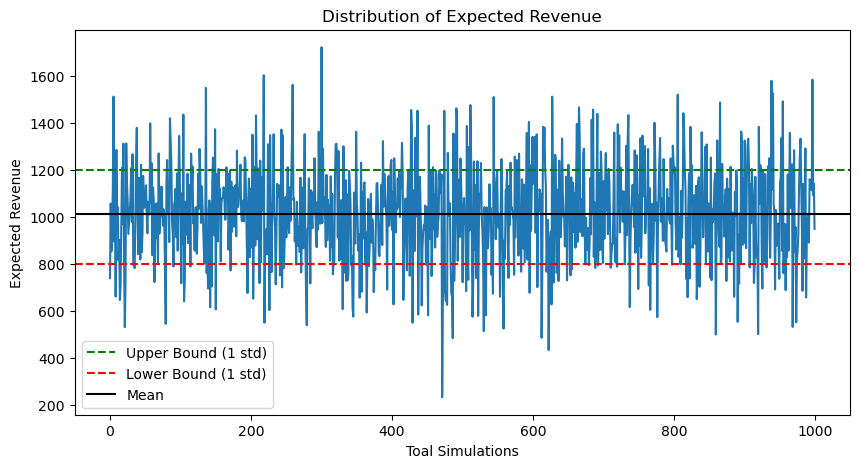

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
plt.figure(figsize=(10,5))
plt.plot(rev)

rev_upper_bound = rev_m + rev_stdev
rev_lower_bound = rev_m - rev_stdev
plt.axhline (y = rev_upper_bound, color = 'g', linestyle = '--', label = 'Upper Bound (1 std)')
plt.axhline (y = rev_lower_bound, color = 'r', linestyle = '--', label = 'Lower Bound (1 std)')

mean_rev = np.mean(rev)
plt.axhline (y = mean_rev, color = 'black', linestyle = '-', label ='Mean')

plt.title ('Distribution of Expected Revenue')
plt.xlabel ('Toal Simulations')
plt.ylabel ('Expected Revenue')
plt.legend()
plt.plot()

print('Max Revenue: ', round(rev.max(),2))
print('Mean Revenue: ', round(rev.mean(),2))
print('Min Revenue: ', round(rev.min(),2))

# COGS

Max COGS:  1022.41
Mean COGS:  602.02
Min COGS:  137.82


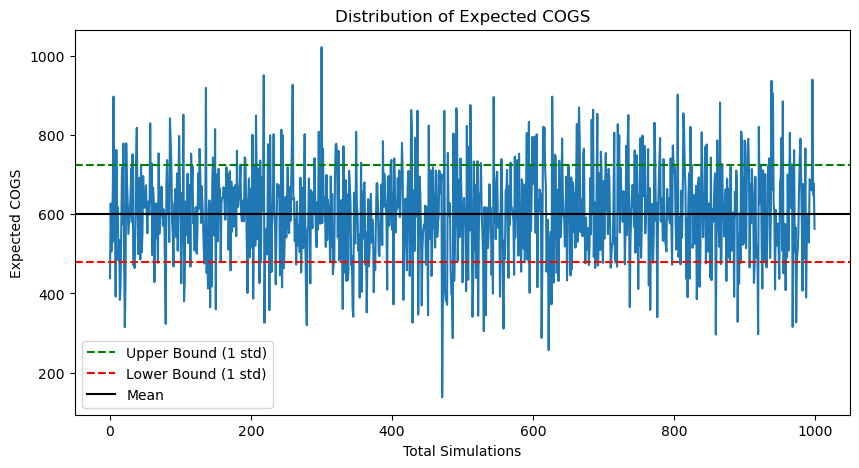

In [4]:
COGS = (rev * np.random.normal(cogs_m, cogs_stdev))
mean_cogs = COGS.mean()
std_cogs = COGS.std()

plt.figure(figsize=(10, 5))
plt.plot(COGS)

cogs_upper_bound = mean_cogs + std_cogs
cogs_lower_bound = mean_cogs - std_cogs

plt.axhline(y=cogs_upper_bound, color='g', linestyle='--', label='Upper Bound (1 std)')
plt.axhline(y=cogs_lower_bound, color='r', linestyle='--', label='Lower Bound (1 std)')
plt.axhline(y=mean_cogs, color='black', linestyle='-', label='Mean')

plt.title('Distribution of Expected COGS')
plt.xlabel('Total Simulations')
plt.ylabel('Expected COGS')
plt.legend()
plt.plot()

print('Max COGS: ', round(COGS.max(),2))
print('Mean COGS: ', round(COGS.mean(),2))
print('Min COGS: ', round(COGS.min(),2))

# Gross Profit

Max Gross Profit:  699.39
Mean Gross Profit:  411.82
Min Gross Profit:  94.28


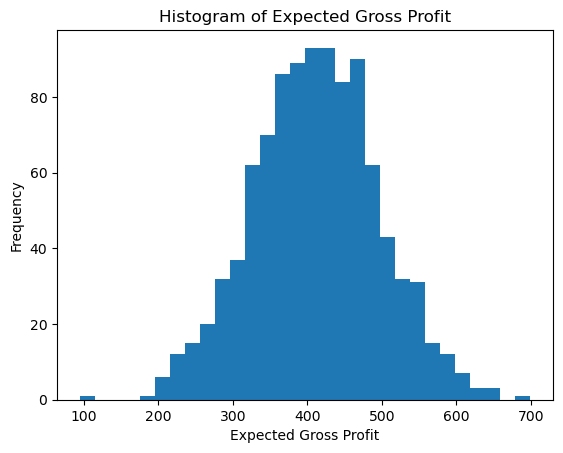

In [5]:
Gross_profit = rev - COGS
plt.hist(Gross_profit, bins=30)
plt.title ('Histogram of Expected Gross Profit')
plt.xlabel ('Expected Gross Profit')
plt.ylabel ('Frequency')
plt.plot()

print('Max Gross Profit: ', round(Gross_profit.max(),2))
print('Mean Gross Profit: ', round(Gross_profit.mean(),2))
print('Min Gross Profit: ', round(Gross_profit.min(),2))

# Net Profit

Max Net Income:  382.63
Mean Net Income:  111.73
Min Net Income:  -210.42


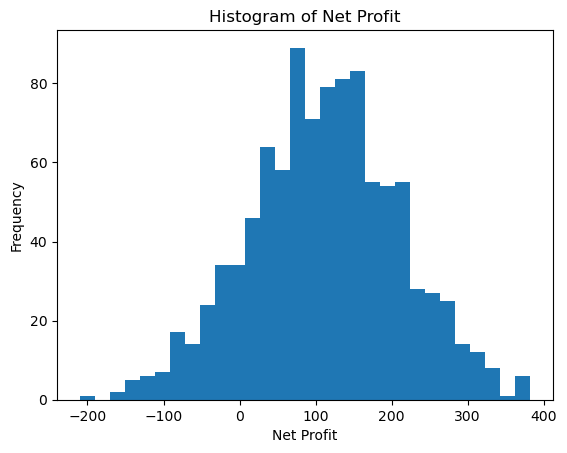

In [6]:
op_expenses = np.random.normal(op_expenses_m, op_expenses_stdev, iterations)

Net_profit = Gross_profit - op_expenses

plt.hist(Net_profit, bins=30)
plt.title ('Histogram of Net Profit')
plt.xlabel ('Net Profit')
plt.ylabel ('Frequency')
plt.plot()

print('Max Net Income: ', round(Net_profit.max(),2))
print('Mean Net Income: ', round(Net_profit.mean(),2))
print('Min Net Income: ', round(Net_profit.min(),2))

In [7]:
profit_margin = (Net_profit / rev) * 100

df = pd.DataFrame({'Revenue': rev,
                   'COGS': COGS,
                   'Gross Profit': Gross_profit,
                   'Operating Expenses': op_expenses,
                   'Net Income': Net_profit,
                   'Profit Margin (%)': profit_margin,
                   })
df.describe()

,Revenue,COGS,Gross Profit,Operating Expenses,Net Income,Profit Margin (%)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1013.843900,602.022782,411.821118,300.090212,111.730906,9.520907
std,207.638434,123.296168,84.342266,49.445284,98.902528,9.612866
min,232.092142,137.816835,94.275308,146.379560,-210.421181,-90.662777
25%,873.783783,518.854770,354.929013,267.207551,45.719403,5.208089
50%,1014.548484,602.441166,412.107318,299.499812,112.445033,11.191095
75%,1146.825743,680.987699,465.838044,334.745665,175.566594,15.937576
max,1721.807488,1022.413149,699.394340,457.413285,382.626214,27.080786
